Processing the request for testing the 'shap' package...
Step 1: shap and other necessary packages imported successfully.
Step 2: shap version is up to date.
Step 3: California housing dataset loaded and split into training and testing sets successfully.
Step 4: XGBoost model trained successfully.


100%|===================| 6187/6192 [00:11<00:00]       

Step 5: SHAP values generated successfully.


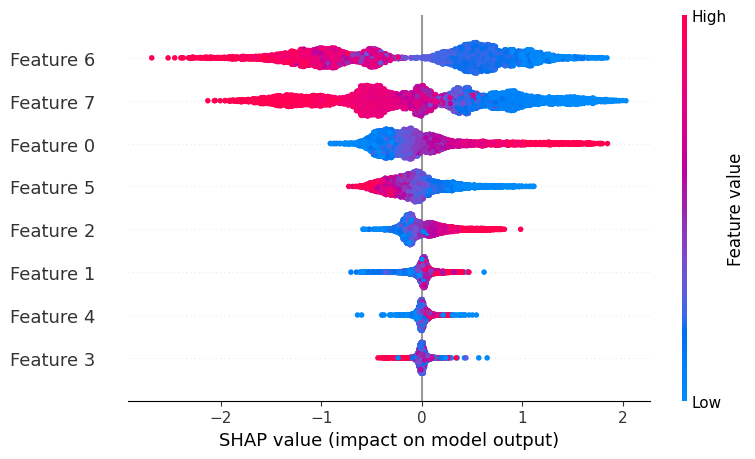

Step 6: SHAP summary plot generated successfully.


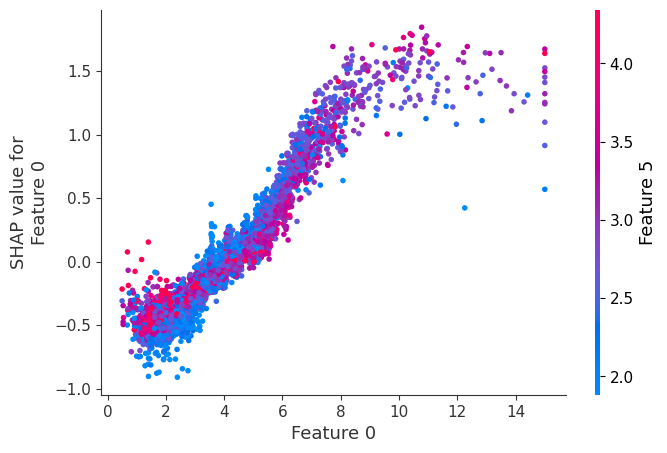

Step 7: SHAP dependence plot generated successfully.
All extensive tests for the 'shap' package completed successfully.


In [2]:
# Confirmation message that the requested package is being processed
print("Processing the request for testing the 'shap' package...")

# Initialize success flag
all_steps_successful = True

# Import necessary packages and check version
try:
    import shap
    import xgboost as xgb
    import numpy as np
    import sklearn.datasets
    from sklearn.model_selection import train_test_split
    assert shap.__version__ >= '0.39', "SHAP version must be 0.39 or later."
    print("Step 1: shap and other necessary packages imported successfully.")
    print("Step 2: shap version is up to date.")
except ImportError as e:
    all_steps_successful = False
    print(f"Step 1 failed: {str(e)}")
except AssertionError as e:
    all_steps_successful = False
    print(f"Step 2 failed: {str(e)}")

# Load the California housing dataset
if all_steps_successful:
    try:
        from sklearn.datasets import fetch_california_housing
        housing = fetch_california_housing()
        X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)
        print("Step 3: California housing dataset loaded and split into training and testing sets successfully.")
    except Exception as e:
        all_steps_successful = False
        print(f"Step 3 failed: {str(e)}")

# Train a model using XGBoost
if all_steps_successful:
    try:
        model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
        model.fit(X_train, y_train)
        print("Step 4: XGBoost model trained successfully.")
    except Exception as e:
        all_steps_successful = False
        print(f"Step 4 failed: {str(e)}")

# Generate SHAP values
if all_steps_successful:
    try:
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_test)
        print("Step 5: SHAP values generated successfully.")
    except Exception as e:
        all_steps_successful = False
        print(f"Step 5 failed: {str(e)}")

# Visualize SHAP values - Summary Plot
if all_steps_successful:
    try:
        shap.summary_plot(shap_values, X_test)
        print("Step 6: SHAP summary plot generated successfully.")
    except Exception as e:
        all_steps_successful = False
        print(f"Step 6 failed: {str(e)}")

# Visualize SHAP values - Dependence Plot
if all_steps_successful:
    try:
        shap.dependence_plot(0, shap_values.values, X_test)
        print("Step 7: SHAP dependence plot generated successfully.")
    except Exception as e:
        all_steps_successful = False
        print(f"Step 7 failed: {str(e)}")

# Final confirmation message if all steps succeed
if all_steps_successful:
    print("All extensive tests for the 'shap' package completed successfully.")
else:
    print("Some steps failed. Please check the messages above for details.")
